In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,ConfusionMatrixDisplay


In [15]:
df = pd.read_csv('processed_data/feature_train.csv')

In [16]:
# feature_set = 'rms|wl|var|zc'
feature_set = 'ch'
X = df.filter(regex=feature_set, axis=1)
y = df['label'].to_numpy()

In [17]:
test_df = pd.read_csv('processed_data/feature_test.csv')
Xtest = test_df.filter(regex=feature_set, axis=1).to_numpy()
ytest = test_df['label'].to_numpy()

# Preprocess the data with scalers

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
Xtest = scaler.transform(Xtest)

/home/alexiswu/2023Fall/NeuroTech/neurotech/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# KNN
## Train

Cross-validation scores: [0.53846154 0.61538462 0.61538462 0.6        0.52      ]
Mean CV accuracy: 0.58
Standard deviation of CV accuracy: 0.04
accuracy is: 0.453125 
 f1 score is: [0.4        0.61538462 0.37037037]


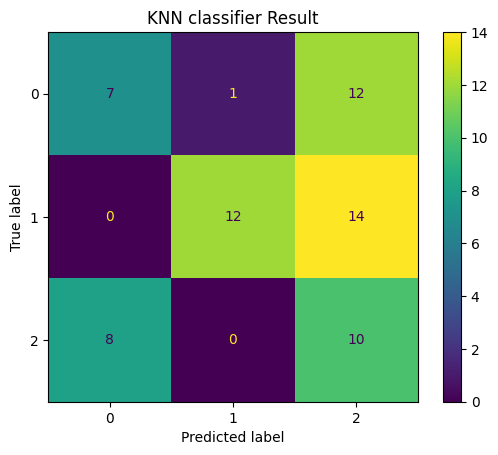

In [21]:
from sklearn.model_selection import GridSearchCV, cross_val_score

knn_grid = {
    'n_neighbors': [2, 3,4, 5,6, 7,8, 9,10, 11,13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, knn_grid, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Output the best parameters
best_params_knn = grid_search_knn.best_params_
knn_best = KNeighborsClassifier(**best_params_knn)
knn_best.fit(X_train, y_train)
cross_val_scores = cross_val_score(knn_best, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean CV accuracy: {cross_val_scores.mean():.2f}")
print(f"Standard deviation of CV accuracy: {cross_val_scores.std():.2f}")

y_pred = knn_best.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(y_val, y_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.title("KNN classifier Result")
plt.savefig(f"result_plots/{feature_set}_KNN_train.png")

## Test

accuracy is: 0.5 
 f1 score is: [0.58823529 0.58064516 0.32258065]


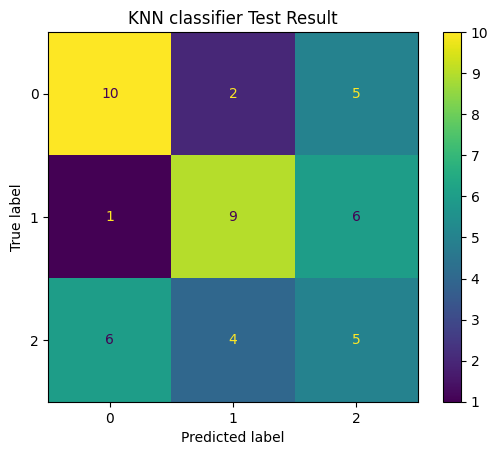

In [22]:
test_pred = knn_best.predict(Xtest)
accuracy = accuracy_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(ytest, test_pred, labels=knn_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_best.classes_)
disp.plot()
plt.title("KNN classifier Test Result")
plt.savefig(f"result_plots/{feature_set}_KNN_test.png")

# SVM


## Train


accuracy is: 0.5 
 f1 score is: [0.52173913 0.55       0.42857143]


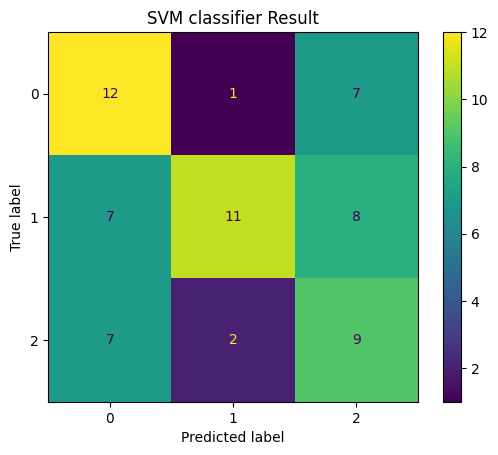

In [23]:
svm_grid ={
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid']

} 

svm = SVC()
grid_search_svm = GridSearchCV(svm, svm_grid, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

best_params_svm = grid_search_svm.best_params_
svm_best = SVC(**best_params_svm)
svm_best.fit(X_train, y_train)
y_pred = svm_best.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(y_val, y_pred, labels=svm_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_best.classes_)
disp.plot()
plt.title("SVM classifier Result")
plt.savefig(f"result_plots/{feature_set}_SVM_train.png")

## Test

accuracy is: 0.625 
 f1 score is: [0.68421053 0.59259259 0.58064516]


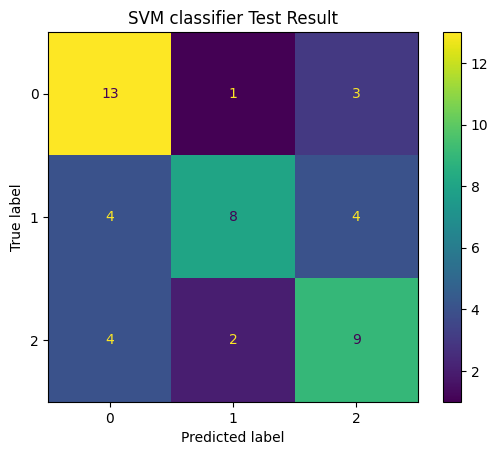

In [24]:
test_pred = svm_best.predict(Xtest)
accuracy = accuracy_score(ytest, test_pred)
f1 = f1_score(ytest, test_pred, average=None)
print(f"accuracy is: {accuracy} \n f1 score is: {f1}")
cm = confusion_matrix(ytest, test_pred, labels=svm_best.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_best.classes_)
disp.plot()
plt.title("SVM classifier Test Result")
plt.savefig(f"result_plots/{feature_set}_SVM_test.png")